In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/catpc/machine lerarning/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.drop(['User ID'],axis=1, inplace=True)

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
df['Gender'] = df['Gender'].map({'Male':1 , 'Female':0})

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


# Train Test Split

In [9]:
from sklearn.preprocessing import StandardScaler

Mean = 0 hoy
standard Devesion =1 hoy
এটাকে বলে Z-score normalization বা standardization।

Xscaled = (X-mean(X))/std(X)


In [10]:
scaler = StandardScaler()

In [11]:
scaler

StandardScaler()

In [12]:
x = df.drop('Purchased',axis=1)
y = df['Purchased']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
x_train.head()

,Gender,Age,EstimatedSalary
3,0,27,57000
18,1,46,28000
202,0,39,134000
250,0,44,39000
274,0,57,26000


In [16]:
x_train.shape

(320, 3)

In [17]:
y_train.head(5)

3      0
18     1
202    1
250    0
274    1
Name: Purchased, dtype: int64

In [18]:
y_train.shape

(320,)

In [19]:
y_test.shape

(80,)

# Applying StandarScaler

In [20]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [21]:
x_train.head()

,Gender,Age,EstimatedSalary
3,0,27,57000
18,1,46,28000
202,0,39,134000
250,0,44,39000
274,0,57,26000


In [22]:
x_train_scaled

array([[-1.        , -1.06675246, -0.38634438],
       [ 1.        ,  0.79753468, -1.22993871],
       [-1.        ,  0.11069205,  1.853544  ],
       [-1.        ,  0.60129393, -0.90995465],
       [-1.        ,  1.87685881, -1.28811763],
       [ 1.        , -0.57615058,  1.44629156],
       [ 1.        ,  0.3069328 , -0.53179168],
       [ 1.        ,  0.99377543,  0.10817643],
       [ 1.        , -1.16487283,  0.45724994],
       [ 1.        , -1.55735433,  0.31180264],
       [ 1.        ,  1.0918958 ,  0.45724994],
       [-1.        , -0.18366908, -0.47361276],
       [ 1.        ,  0.20881242, -0.32816546],
       [-1.        ,  0.3069328 ,  0.28271318],
       [ 1.        , -1.16487283, -1.57901222],
       [-1.        ,  0.11069205,  0.25362372],
       [ 1.        ,  2.07309956,  1.73718616],
       [ 1.        ,  0.40505317, -0.18271817],
       [-1.        ,  1.4843773 ,  2.11534913],
       [ 1.        , -0.37990983,  1.21357589],
       [-1.        ,  1.87685881,  1.504

In [23]:
x_train_scaled_df = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)


In [24]:
x_train_scaled_df.head()


,Gender,Age,EstimatedSalary
0,-1.0,-1.066752,-0.386344
1,1.0,0.797535,-1.229939
2,-1.0,0.110692,1.853544
3,-1.0,0.601294,-0.909955
4,-1.0,1.876859,-1.288118


In [25]:
x_test_scaled_df.head()

,Gender,Age,EstimatedSalary
0,-1.0,0.797535,-1.404475
1,-1.0,2.073100,0.515429
2,-1.0,-0.968632,-0.764507
3,-1.0,0.993775,0.748145
4,-1.0,-0.870512,-1.229939


In [26]:
np.round(x_train.describe(),2)

,Gender,Age,EstimatedSalary
count,320.0,320.00,320.00
mean,0.5,37.87,70281.25
std,0.5,10.21,34430.55
min,0.0,18.00,15000.00
25%,0.0,30.00,43000.00
50%,0.5,37.00,71000.00
75%,1.0,45.00,88000.00
max,1.0,60.00,150000.00


In [27]:
np.round(x_train_scaled_df.describe(),2)

,Gender,Age,EstimatedSalary
count,320.0,320.00,320.00
mean,0.0,-0.00,0.00
std,1.0,1.00,1.00
min,-1.0,-1.95,-1.61
25%,-1.0,-0.77,-0.79
50%,0.0,-0.09,0.02
75%,1.0,0.70,0.52
max,1.0,2.17,2.32


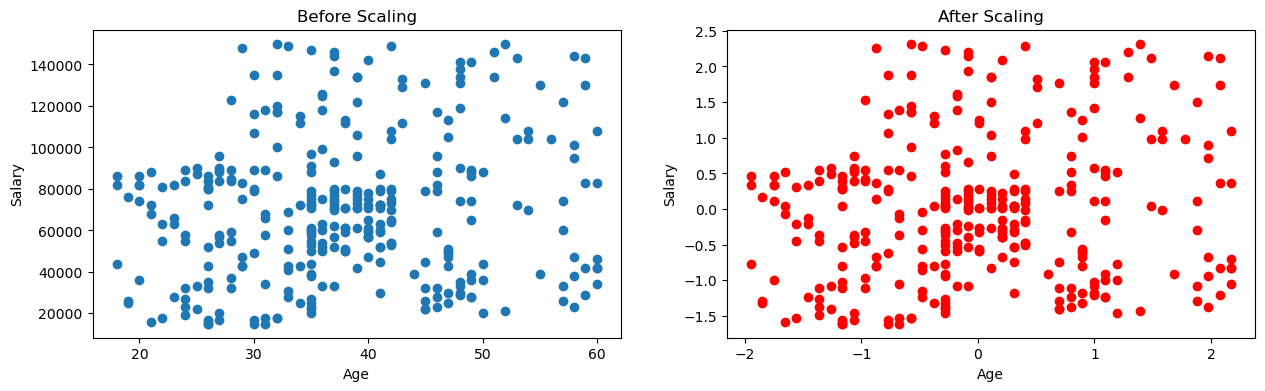

In [31]:
fix, (x1, x2) = plt.subplots(1, 2, figsize=(15, 4))

# First subplot: before scaling
x1.scatter(x_train['Age'], x_train['EstimatedSalary'])
x1.set_title("Before Scaling")
x1.set_xlabel("Age")
x1.set_ylabel("Salary")

# Second subplot: after scaling
x2.scatter(x_train_scaled_df['Age'], x_train_scaled_df['EstimatedSalary'], color='red')
x2.set_title("After Scaling")
x2.set_xlabel("Age")
x2.set_ylabel("Salary")

plt.show()
